In [1]:
import torch
import pandas as pd
from PIL import Image

import sys
sys.path.append('../../')
from model_runner import ModelRunner
from image_helper import ImageHelper
from SRCNN import SRCNN

sys.path.append('../../DBPN/')
from DBPN_copied import DBPN

In [2]:
DATASET_ROOT="../../datasets/"
DATASET_NAME = "Set5"
FULL_DATASET_PATH = f"{DATASET_ROOT}{DATASET_NAME}"
model_runner = ModelRunner()
image_helper = ImageHelper()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load models
test_model = DBPN(num_channels=3, base_filter=64,  feat = 256, num_stages=7, scale_factor=4).to(device)
model_f2_5 = SRCNN(f2=5).to(device)
try:
    test_model.load_state_dict(torch.load('./trained_models/model_L_big_data.pth'))
    model_f2_5.load_state_dict(torch.load('../srcnn/trained_models/model_f2_5.pth')) 

except:
    test_model.load_state_dict(torch.load('./trained_models/model_L_big_data.pth', map_location=torch.device('cpu')))
    model_f2_5.load_state_dict(torch.load('../srcnn/trained_models/model_f2_5.pth', map_location=torch.device('cpu')))


In [4]:
# # Load dataframes
# model_f2_1_df = pd.read_csv('./dataframes/model_f2_1.csv')
# model_f2_1_unfiltered_df = pd.read_csv('./dataframes/model_f2_1_unfiltered.csv')
# model_f2_lr_fixed_df = pd.read_csv('./dataframes/model_f2_1_lr_fixed_1e-3.csv')
# model_f2_5_df = pd.read_csv('./dataframes/model_f2_5.csv')
# model_f2_5_unfiltered_df = pd.read_csv('./dataframes/model_f2_5_unfiltered.csv')


/home/pedrovelozo/TCC-Pedro-Velozo-ENG1132/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


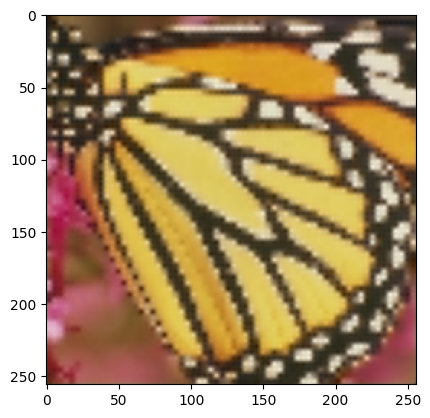

In [5]:
image_helper.apply_model_to_image_and_show(
    model=test_model,
    image=f"{FULL_DATASET_PATH}/butterfly.png",
    downsample_factor=4,
    should_upsample=False,
    unsqueeze=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


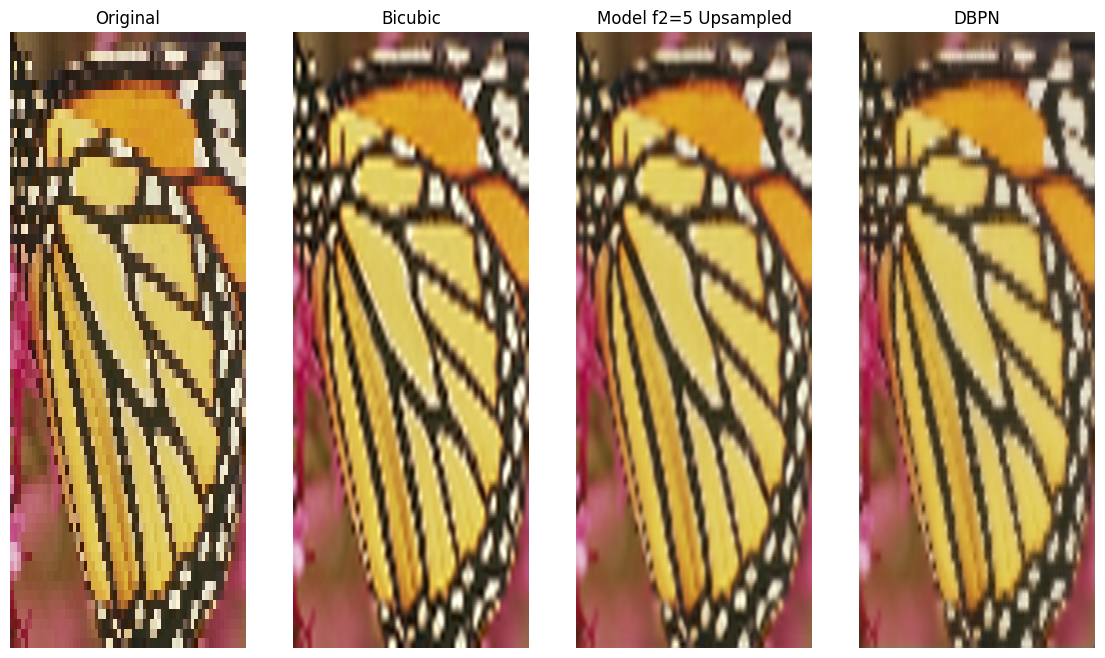

In [6]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/butterfly.png"

image_helper.show_tensor_as_images_side_by_side(
    [
        {
            "label": "Original",
            "tensor": image_helper.downsample_image_as_tensor(
                IMAGE_EXAMPLE, 4, interpolation=Image.BICUBIC,
            ),
        },
        {
            "label": "Bicubic",
            "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                IMAGE_EXAMPLE, 4
            ),
        },
        {
            "label": "Model f2=5 Upsampled",
            "tensor": image_helper.apply_model_to_image(
                model_f2_5,
                IMAGE_EXAMPLE,
                4
            )
        },
        {
            "label": "DBPN",
            "tensor": image_helper.apply_model_to_image(
                model=test_model,
                image=IMAGE_EXAMPLE,
                downsample_factor=4,
                should_upsample=False,
                unsqueeze=True
            )
        },
    ],
    not
)

In [23]:
model_runner.compare_models(
    [
        # {
        #     "name": "f2=1",
        #     "model": model_f2_1,
        # },
        {
            "name": "DBPN",
            "model": test_model,
        },
        {
            "name": "SRCNN",
            "model": model_f2_5,
        },
        # {
        #     "name": "f2=5 unfiltered",
        #     "model": model_f2_5_unfiltered,
        # },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]


RuntimeError: Given groups=1, weight of size [64, 128, 1, 1], expected input[1, 64, 2048, 1024] to have 128 channels, but got 64 channels instead

## **Comparando o treinamento**

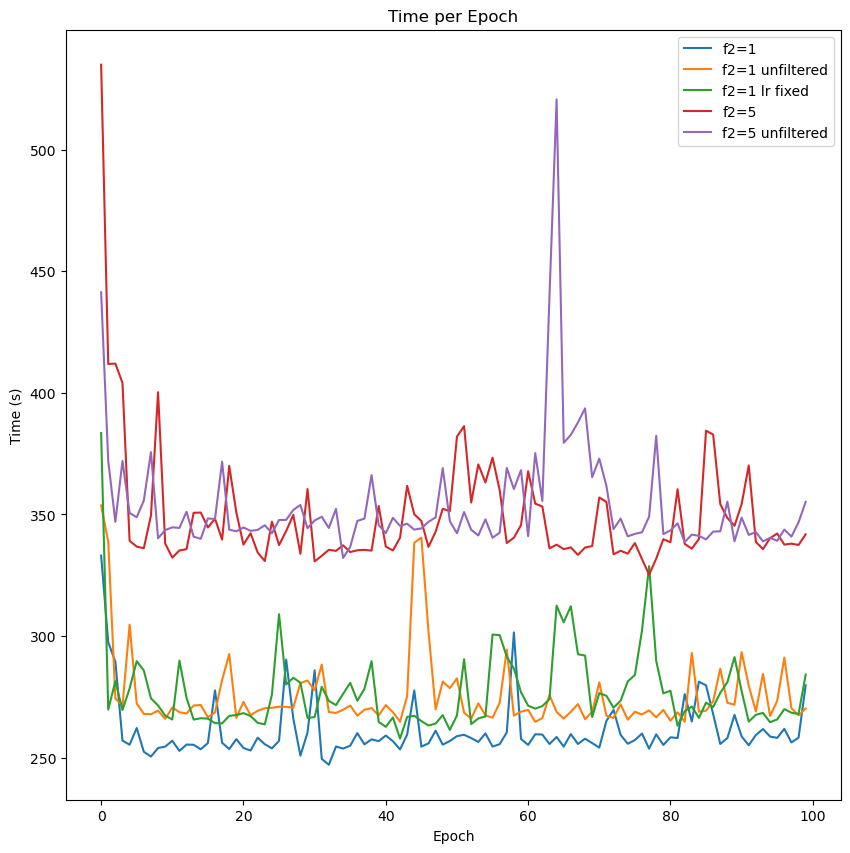

In [9]:
model_runner.plot_time_per_epoch_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)


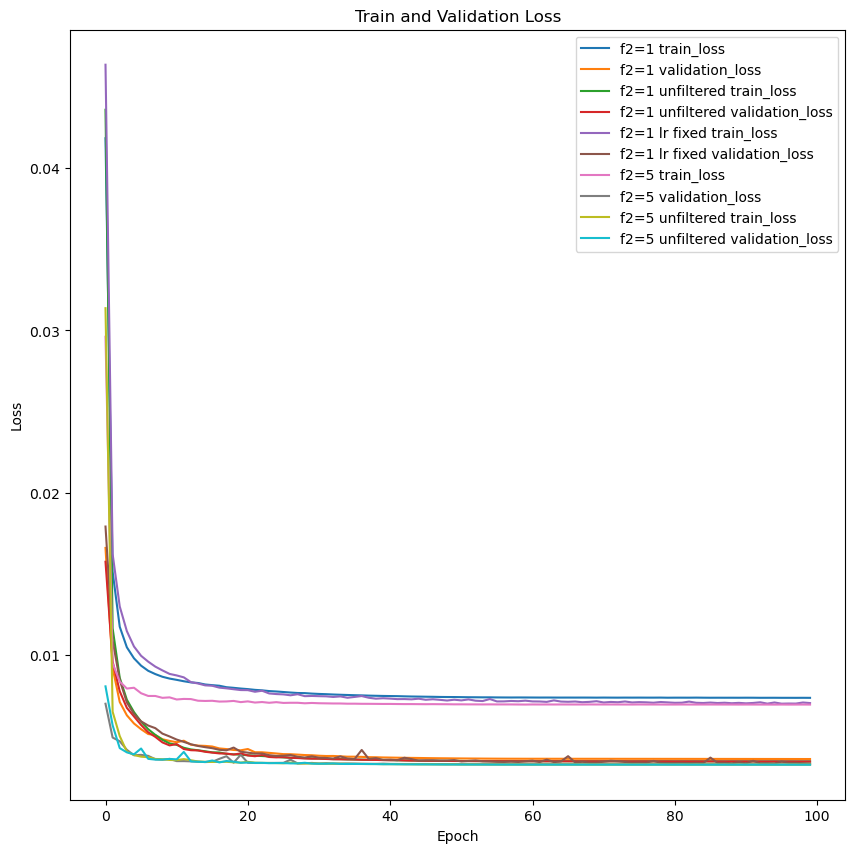

In [13]:
model_runner.plot_train_validation_loss_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
    False
)

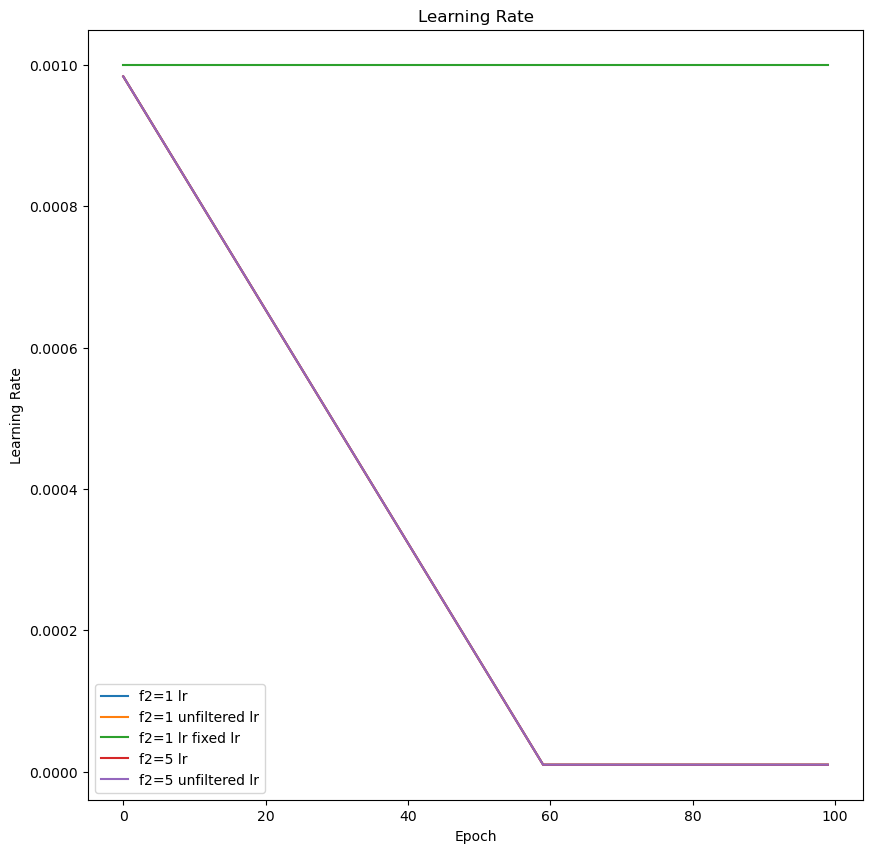

In [14]:
model_runner.plot_lr_comparison(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)

#### - F2 maior -> maior tempo de processamento

## **Comparando os resultados**

In [15]:
model_runner.compare_models(
    [
        {
            "name": "f2=1",
            "model": model_f2_1,
        },
        {
            "name": "f2=1 unfiltered",
            "model": model_f2_1_unfiltered,
        },
        {
            "name": "f2=1 lr fixed",
            "model": model_f2_lr_fixed,
        },
        {
            "name": "f2=5",
            "model": model_f2_5,
        },
        {
            "name": "f2=5 unfiltered",
            "model": model_f2_5_unfiltered,
        },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
14it [00:17,  1.27s/it]
14it [00:16,  1.18s/it]
14it [00:17,  1.22s/it]
14it [00:19,  1.40s/it]
14it [00:18,  1.36s/it]


,f2=1,f2=1 unfiltered,f2=1 lr fixed,f2=5,f2=5 unfiltered
PSNR,24.557707,24.604319,24.804457,24.815763,24.759735
Bicubic PSNR,24.496826,24.496826,24.496826,24.496826,24.496826
SSIM,0.714441,0.717399,0.724465,0.726433,0.724994
Bicubic SSIM,0.731671,0.731671,0.731671,0.731671,0.731671


Podemos observar que o os dados filtrados fizeram uma diferenca no caso em que f2=5 **[Vai ser mostrado quando eu ajeitar os pesos do f2_5]**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


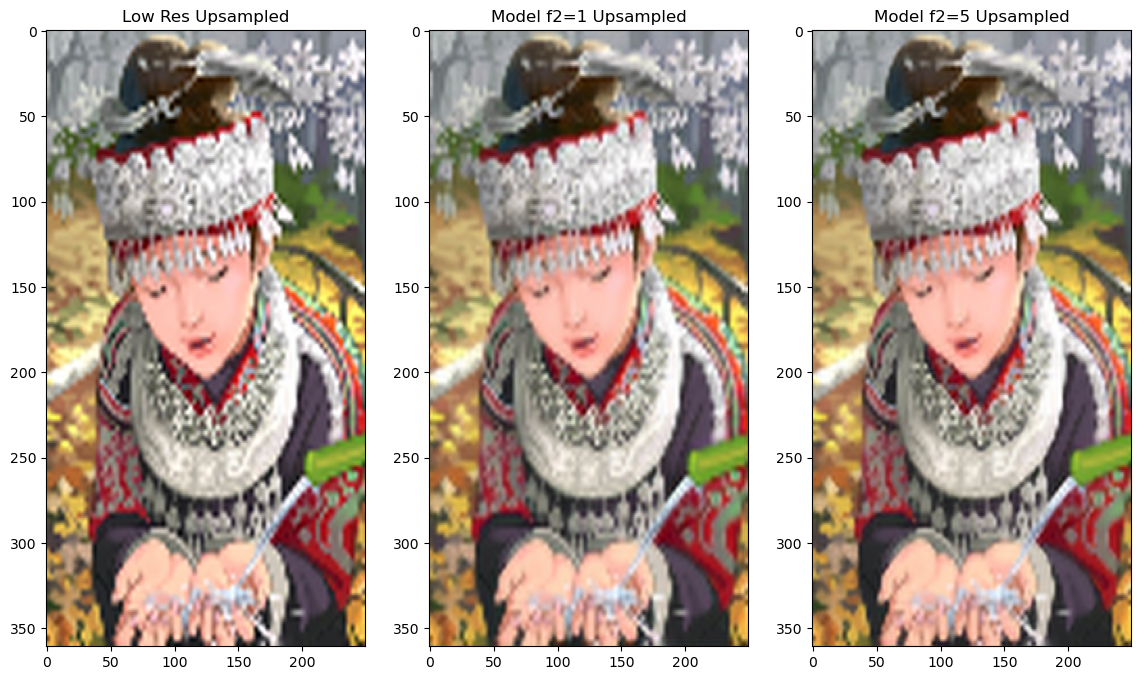

In [11]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/comic.png"

image_helper.show_tensor_as_images_side_by_side(
   [
        #  {
        #         "label": "Original",
        #         "tensor": image_helper.image_to_tensor(
        #            IMAGE_EXAMPLE
        #         ),
        #  },
            {
                "label": "Low Res Upsampled",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    IMAGE_EXAMPLE, 3
                ),
            },
            {
                "label": "Model f2=1 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_1,
                    IMAGE_EXAMPLE,
                    3
                )
            },
            {
                "label": "Model f2=5 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    IMAGE_EXAMPLE,
                    3
                )
            },
            # {
            #     "label": "Model f2=1 Unfiltered Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_1_unfiltered,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
            # {
            #     "label": "Model f2=5 Unfiltered Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_5_unfiltered,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
            # {
            #     "label": "Model f2=1 lr fixed Upsampled",
            #     "tensor": image_helper.apply_model_to_image(
            #         model_f2_lr_fixed,
            #         IMAGE_EXAMPLE,
            #         3
            #     )
            # },
   ],
   show_grid=False
)